<a href="https://colab.research.google.com/github/GuilhermeRLDev/DeepLearningExperiments/blob/main/HandlingAudioExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!pip install jams
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64923 sha256=7cd30c866f1eb82c38c7433a16b48139ffe56641eb34ac19d66e8bde76e49f95
  Stored in directory: /root/.cache/pip/wheels/3a/30/bd/89f3791651385a3a5f02865508db932f506b26304f0e428593
  Created wheel for mir_eval: filename=mir_eval-0.7-py3-none-any.whl size=100718 sha256=51c3548b56918c2857eef5f0918dd4affd589404c2ca0fd9252fcf756b24aed6
  Stored in directory: /root/.cache/pip/wheels/e9/f5/d5/eb3db1d056253da195208853842bce745a84b29f44cab59b6c
Successfully built jams mir_eval
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━

In [3]:
import jams
import os

#Processing data for encoder
#Constants 
GUITAR_DATASET = "gdrive/MyDrive/datasets"

#Loading and preprocessing functions
def get_path_training(path, total_samples):
  '''
    Return x number of samples from disk 
  '''
  data_path = f"{path}/data"
  labels_path = f"{path}/labels"
  data = os.listdir(data_path)
  labels = os.listdir(labels_path)

  files = []
  i = 0
  for file in labels:

    if i == total_samples:
      break

    file_name = file.split(".")[0]
    if file_name in files:
      continue

    # Load data and anotation for the samples
    files.append({"audio":f"{data_path}/{file_name}_hex.wav", "label":f"{labels_path}/{file_name}.jams"})
    i += 1

  return files

dataset = get_path_training(GUITAR_DATASET, 360)


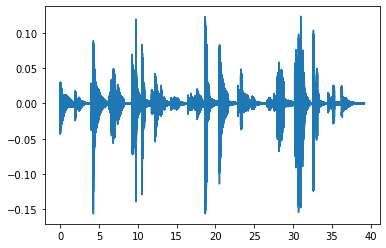

In [6]:
import librosa
import IPython
import IPython.display
import numpy as np
import matplotlib.pyplot as plt

#Load audio  for example
#Exaple audio
path = "gdrive/MyDrive/datasets/data/05_SS3-98-C_solo_hex.wav"
path_labels = "gdrive/MyDrive/datasets/labels/05_SS3-98-C_solo.jams"

def plot_amplitude(x, sr):
    y = np.arange(len(x))/sr
    plt.figure()
    plt.plot(y, x)

test_audio, sr_test = librosa.load(path)

plot_amplitude(test_audio, sr_test)

IPython.display.display(IPython.display.Audio(test_audio, rate=sr_test))

39.178875
39.178875


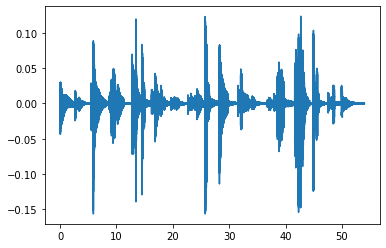

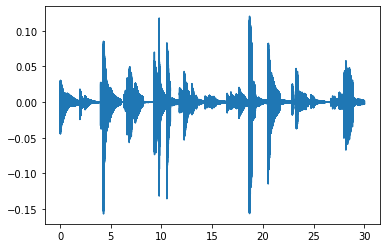

In [7]:
#get log spectogram for audio

SAMPLING_RATE = 16000

x = test_audio
sr = sr_test

def resize_audio(x, sr, target_sr, lenght_in_secs):
    #Resample audio
    x= librosa.resample(x, orig_sr=sr, target_sr=target_sr)

    #Make sure audio has 30 seconds
    audio_len = len(x) / target_sr

    print(audio_len)

    if audio_len < lenght_in_secs:
        padding_arr = np.zeros((30 * target_sr)-len(x))
        x = np.append(x, padding_arr)

    if audio_len > lenght_in_secs:
        print(audio_len)
        x = x[0:lenght_in_secs*target_sr]

    return x, target_sr

plot_amplitude(x, SAMPLING_RATE)

x, sr = resize_audio(x, sr, SAMPLING_RATE, 30)

plot_amplitude(x, sr)

IPython.display.display(IPython.display.Audio(x, rate=sr))

15.0
15


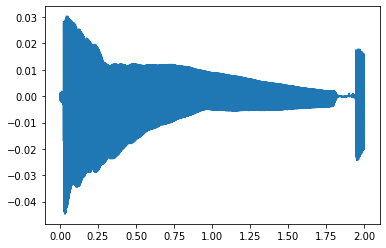

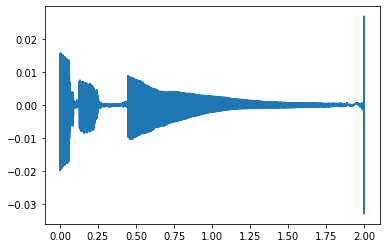

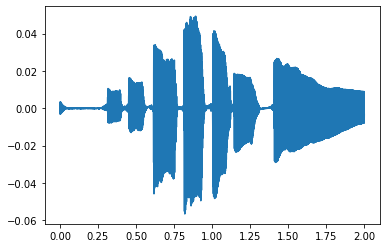

In [8]:
def split_audio(x, sr, size):
    size_segments = size * sr
    total_segments = len(x) / size_segments
    print(total_segments)
    return np.array_split(x, total_segments)

x_segments = split_audio(x, sr, 2)

print(len(x_segments))

plot_amplitude(x_segments[0], sr)
plot_amplitude(x_segments[1], sr)
plot_amplitude(x_segments[3], sr)

IPython.display.display(IPython.display.Audio(x_segments[0], rate=sr))
IPython.display.display(IPython.display.Audio(x_segments[1], rate=sr))
IPython.display.display(IPython.display.Audio(x_segments[2], rate=sr))

(12, 63)
[2.19848752e-02 9.45987646e-03 5.52330771e-03 4.82481904e-03
 4.42415848e-03 4.11017938e-03 3.84731591e-03 3.55728320e-03
 3.24256928e-03 2.96909804e-03 2.71888915e-03 2.43974454e-03
 2.11316580e-03 1.81489461e-03 1.58870616e-03 1.40771898e-03
 1.25562679e-03 1.12274452e-03 1.00256864e-03 8.89728137e-04
 7.87909492e-04 6.97679527e-04 6.14454038e-04 5.42282767e-04
 4.73820255e-04 4.08319553e-04 3.55145545e-04 3.15106940e-04
 2.82452907e-04 2.49026780e-04 2.18222514e-04 1.89500279e-04
 1.67041057e-04 1.48480889e-04 1.32822737e-04 1.20350232e-04
 1.06694075e-04 9.26828870e-05 8.17743858e-05 7.31717082e-05
 6.68678695e-05 6.23331798e-05 5.63055255e-05 5.17184708e-05
 4.95035747e-05 4.56097696e-05 4.51578671e-05 5.09419260e-05
 3.92744041e-05 3.17451049e-05 2.94339607e-05 2.66933384e-05
 2.42415990e-05 2.15618838e-05 2.10159560e-05 2.61309197e-05
 9.56482836e-05 3.09605472e-04 1.94606744e-02 1.86116189e-01
 1.01573309e-02 3.70724057e-03 3.52313439e-03]
[4.66743968e-02 3.34158316e-0

/usr/local/lib/python3.9/dist-packages/librosa/core/pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


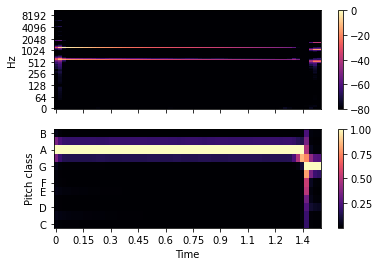

In [9]:
import librosa.display

def get_log_spectogram(x, sr, display=False):
    S = np.abs(librosa.stft(x, n_fft=2048))**2
    chroma = librosa.feature.chroma_stft(S=S, sr=sr)

    if display:
        fig, ax = plt.subplots(nrows=2, sharex=True)
        img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
        fig.colorbar(img, ax=[ax[0]])
        ax[0].label_outer()
        img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
        fig.colorbar(img, ax=[ax[1]])
    
    return chroma, S

chroma, S = get_log_spectogram(x_segments[0], SAMPLING_RATE, True)
print(np.shape(chroma))
print(chroma[0])
print(chroma[1])
chroma1 = get_log_spectogram(x_segments[1], True)
print(chroma1)
chroma2 = get_log_spectogram(x_segments[2], True)

#function to print spectograms
def print_spectograms(size, segments):
    for i in range(size):
        print(f"Sample {i}:")
        chroma2 = get_log_spectogram(segments[i], True)

#Print segments for spectograms
print_spectograms(5, x_segments)


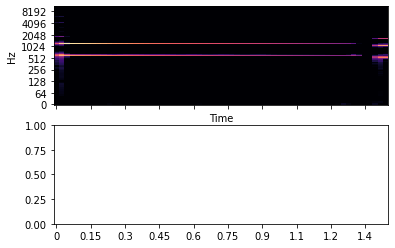

In [10]:
def get_log_spectograms(segments, sr):
    spectograms = []
    for segment in segments:
        chroma, S = get_log_spectogram(segment, sr)
        spectograms.append(S)

    return np.array(spectograms)

spectograms = get_log_spectograms(x_segments, SAMPLING_RATE)

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(spectograms[0], ref=np.max),
                        y_axis='log', x_axis='time', ax=ax[0])
plt.show()


In [11]:
import jams

In [12]:
import pretty_midi

#Rewrite this function to convert jams to Midi
def jams_to_midi(jam, q=1):
    midi = pretty_midi.PrettyMIDI()
    #Get notes
    annotations = jam.search(namespace='note_midi')
    #Get pitch
    if len(annotations) == 0:
        annotations = jam.search(namespace='pitch_midi')
    for anno in annotations:
        #Unique instrument
        midi_ch = pretty_midi.Instrument(program=25)
        for note in anno:
            pitch = int(round(note.value))
            bend_amount = int(round((note.value - pitch) * 4096))
            st = note.time
            dur = note.duration
            n = pretty_midi.Note(
                velocity=100 + np.random.choice(range(-5, 5)),
                pitch=pitch, start=st,
                end=st + dur
            )
            pb = pretty_midi.PitchBend(pitch=bend_amount * q, time=st)
            midi_ch.notes.append(n)
            midi_ch.pitch_bends.append(pb)
        if len(midi_ch.notes) != 0:
            midi.instruments.append(midi_ch)
    return midi

In [13]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch: end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(8, 4))
plot_piano_roll(pretty_midi_object, 60, 128, 31)


NameError: ignored

<Figure size 576x288 with 0 Axes>

In [14]:
def piano_roll_to_pretty_midi(piano_roll, fs=100, program=0):
    notes, frames = piano_roll.shape
    pm = pretty_midi.PrettyMIDI()
    instrument = pretty_midi.Instrument(program=program)

    # pad 1 column of zeros so we can acknowledge inital and ending events
    piano_roll = np.pad(piano_roll, [(0, 0), (1, 1)], 'constant')

    # use changes in velocities to find note on / note off events
    velocity_changes = np.nonzero(np.diff(piano_roll).T)

    # keep track on velocities and note on times
    prev_velocities = np.zeros(notes, dtype=int)
    note_on_time = np.zeros(notes)

    for time, note in zip(*velocity_changes):
        # use time + 1 because of padding above
        velocity = piano_roll[note, time + 1]
        time = time / fs
        if velocity > 0:
            if prev_velocities[note] == 0:
                note_on_time[note] = time
                prev_velocities[note] = velocity
        else:
            pm_note = pretty_midi.Note(
                velocity=prev_velocities[note],
                pitch=note,
                start=note_on_time[note],
                end=time)
            instrument.notes.append(pm_note)
            prev_velocities[note] = 0
    pm.instruments.append(instrument)
    return pm

In [15]:
from sklearn.preprocessing import MinMaxScaler

def load_datasets(dataset):
  X = []
  Y = []
  for file in dataset[0:50]:
    amplitude, sr = librosa.load(file['audio'])
    amplitude, sr= resize_audio(amplitude, sr, SAMPLING_RATE, 30)
    samples_split = split_audio(amplitude, SAMPLING_RATE, 2)
    for sample in samples_split:
      Y.append(sample)

    jams_object = jams.load(file['label'])

    #Build pretty MIDI object
    pretty_midi_object = jams_to_midi(jams_object)

    piano_roll = pretty_midi_object.get_piano_roll(100)
    
    size = 200 #int(np.shape(piano_roll)[1] / len(x_segments))
    piano_roll  = piano_roll.T[0:len(samples_split)*200]

    slices = []
    print(f"Size of slices: {size}")
    for i in range(len(samples_split)):
        start = i * size 
        
        if (start+size) < len(piano_roll):
          slice = piano_roll[start: start+size]
        else: 
          slice = piano_roll[start:]

        if len(slice) < size:
          append_array = np.zeros((size - len(slice), 128))
          slice = np.append(slice, append_array, axis=0)
        
        slices.append(slice)

    for slice in slices:
        slice = slice.T
        X.append(slice)

  print(f"Shape X {np.shape(X)}")
  print(f"Shape Y {np.shape(Y)}")

  return X, Y

X, Y= load_datasets(dataset) 

28.8
15.0
Size of slices: 200
34.90325
34.90325
15.0
Size of slices: 200
32.0
32.0
15.0
Size of slices: 200
27.0416875
15.0
Size of slices: 200
39.178875
39.178875
15.0
Size of slices: 200
25.2584375
15.0
Size of slices: 200
39.178875
39.178875
15.0
Size of slices: 200
22.3244375
15.0
Size of slices: 200
34.2844375
34.2844375
15.0
Size of slices: 200
20.5320625
15.0
Size of slices: 200
32.0
32.0
15.0
Size of slices: 200
32.8164375
32.8164375
15.0
Size of slices: 200
27.0416875
15.0
Size of slices: 200
22.14725
15.0
Size of slices: 200
35.5484375
35.5484375
15.0
Size of slices: 200
28.02325
15.0
Size of slices: 200
32.26325
32.26325
15.0
Size of slices: 200
25.940875
15.0
Size of slices: 200
34.90325
34.90325
15.0
Size of slices: 200
28.8
15.0
Size of slices: 200
25.6
15.0
Size of slices: 200
14.4
15.0
Size of slices: 200
42.3464375
42.3464375
15.0
Size of slices: 200
25.2584375
15.0
Size of slices: 200
22.3244375
15.0
Size of slices: 200
43.62925
43.62925
15.0
Size of slices: 200
22.14

<ipython-input-13-62d13dc15220>:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch: end_pitch],


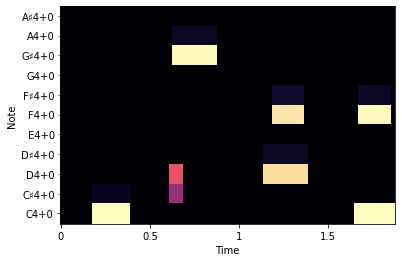

In [16]:
back_to_pretty = piano_roll_to_pretty_midi(X[250])
#print(np.shape(piano_roll[:, 0:74]))
plot_piano_roll(back_to_pretty, 60, 71)
IPython.display.display(IPython.display.Audio(Y[250], rate=SAMPLING_RATE))
IPython.display.display(IPython.display.Audio(back_to_pretty.synthesize(fs=SAMPLING_RATE), rate=SAMPLING_RATE))

In [17]:
instruments = back_to_pretty.instruments

for instrument in instruments:
    print(len(instrument.notes))

#print(np.shape(piano_roll))

16


Chroma
0.000101498845
Piano roll
0.0


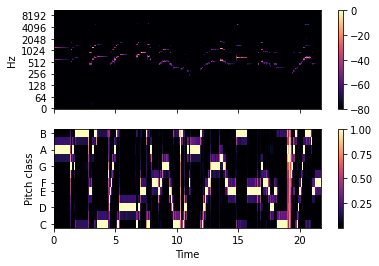

In [18]:
chroma, S = get_log_spectogram(x[0:SAMPLING_RATE * 30], SAMPLING_RATE, True)

chroma = chroma*100

prediction_to_pretty = piano_roll_to_pretty_midi(chroma)

print("Chroma")
print(np.min(chroma))
print("Piano roll")
print(np.min(X[250]))

IPython.display.display(IPython.display.Audio(prediction_to_pretty.synthesize(), rate=SAMPLING_RATE))

In [19]:
import pandas as pd
print(np.shape(S))
print(len(x))

chroma_pd = pd.DataFrame(chroma)
print(chroma_pd[0].value_counts())

(1025, 938)
480000
2.198488      1
4.667439      1
1.425371      1
1.205758      1
4.101344      1
2.266638      1
2.172983      1
4.663132      1
34.825974     1
100.000000    1
35.186611     1
4.600840      1
Name: 0, dtype: int64


In [20]:
print(np.shape(X[250]))

pianoroll_vl = pd.DataFrame(X[250])
pd.set_option('display.max_columns', None) 

print(pianoroll_vl[4].value_counts())

(128, 200)
0.000000     126
87.531738      1
14.468262      1
Name: 4, dtype: int64


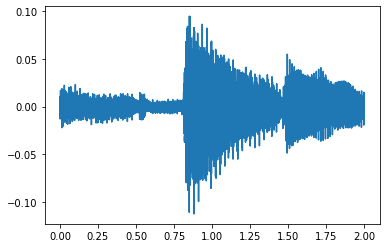

In [21]:
plot_amplitude(Y[100], SAMPLING_RATE)
IPython.display.display(IPython.display.Audio(Y[0], rate=SAMPLING_RATE))

In [22]:
!pip install -qqq tensorflow_addons
!pip install -qqq tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 57.3 MB/s eta 0:00:00


In [23]:
import tensorflow as tf
import tensorflow_io as tfio
from tensorflow import keras
import tensorflow_addons as tfa

In [65]:
class MelSpec(tf.keras.layers.Layer):
    def __init__(
        self,
        frame_length=1024,
        frame_step=256,
        fft_length=None,
        sampling_rate=22050,
        num_mel_channels=80,
        freq_min=125,
        freq_max=7600,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.frame_length = frame_length
        self.frame_step = frame_step
        self.fft_length = fft_length
        self.sampling_rate = sampling_rate
        self.num_mel_channels = num_mel_channels
        self.freq_min = freq_min
        self.freq_max = freq_max
        # Defining mel filter. This filter will be multiplied with the STFT output
        self.mel_filterbank = tf.signal.linear_to_mel_weight_matrix(
            num_mel_bins=self.num_mel_channels,
            num_spectrogram_bins=self.frame_length // 2 + 1,
            sample_rate=self.sampling_rate,
            lower_edge_hertz=self.freq_min,
            upper_edge_hertz=self.freq_max,
        )

    def call(self, audio, training=True):
        # We will only perform the transformation during training.
        if training:
            # Taking the Short Time Fourier Transform. Ensure that the audio is padded.
            # In the paper, the STFT output is padded using the 'REFLECT' strategy.
            stft = tf.signal.stft(
                tf.squeeze(audio, -1),
                self.frame_length,
                self.frame_step,
                self.fft_length,
                pad_end=True,
            )

            # Taking the magnitude of the STFT output
            magnitude = tf.abs(stft)

            # Multiplying the Mel-filterbank with the magnitude and scaling it using the db scale
            mel = tf.matmul(tf.square(magnitude), self.mel_filterbank)
            log_mel_spec = tfio.audio.dbscale(mel, top_db=80)
            
            return log_mel_spec
        else:
            return audio

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "frame_length": self.frame_length,
                "frame_step": self.frame_step,
                "fft_length": self.fft_length,
                "sampling_rate": self.sampling_rate,
                "num_mel_channels": self.num_mel_channels,
                "freq_min": self.freq_min,
                "freq_max": self.freq_max,
            }
        )
        return config



In [25]:
def residual_stack(input, filters):
    """Convolutional residual stack with weight normalization.

    Args:
        filter: int, determines filter size for the residual stack.

    Returns:
        Residual stack output.
    """
    c1 = tf.keras.layers.Conv1D(filters, 3, dilation_rate=1, padding="same")(input)
    lrelu1 = tf.keras.layers.LeakyReLU()(c1)
    c2 = tf.keras.layers.Conv1D(filters, 3, dilation_rate=1, padding="same")(lrelu1)
    add1 = tf.keras.layers.Add()([c2, input])

    lrelu2 = tf.keras.layers.LeakyReLU()(add1)
    c3 = tf.keras.layers.Conv1D(filters, 3, dilation_rate=3, padding="same")(lrelu2)
    lrelu3 = tf.keras.layers.LeakyReLU()(c3)
    c4 = tf.keras.layers.Conv1D(filters, 3, dilation_rate=1, padding="same")(lrelu3)
    add2 = tf.keras.layers.Add()([add1, c4])

    lrelu4 = tf.keras.layers.LeakyReLU()(add2)
    c5 = tf.keras.layers.Conv1D(filters, 3, dilation_rate=1, padding="same")(lrelu3)
    lrelu5 = tf.keras.layers.LeakyReLU()(c5)
    c6 = tf.keras.layers.Conv1D(filters, 3, dilation_rate=1, padding="same")(lrelu3)
    add3 = tf.keras.layers.Add()([c6, add2])

    return add3

In [26]:
x = tf.keras.layers.LeakyReLU()(x)
print(np.shape(x))

(480000,)


In [27]:
def conv_block(input, conv_dim, upsampling_factor):
    """Dilated Convolutional Block with weight normalization.

    Args:
        conv_dim: int, determines filter size for the block.
        upsampling_factor: int, scale for upsampling.

    Returns:
        Dilated convolution block.
    """
    conv_t = tf.keras.layers.Conv1DTranspose(conv_dim, 16, upsampling_factor, padding="same")(input)
    lrelu1 = tf.keras.layers.LeakyReLU()(conv_t)
    res_stack = residual_stack(lrelu1, conv_dim)
    lrelu2 = tf.keras.layers.LeakyReLU()(res_stack)
    return lrelu2

#x = conv_block(x, 256, 8)
#x = conv_block(x, 128, 8)
#x = conv_block(x, 64, 2)
#x = conv_block(x, 32, 2)
#x= tf.keras.layers.Conv1D(1, 7, padding="same", activation="tanh")(x)
print(np.shape(x))

(480000,)


In [29]:
#Stitching the network together
input = tf.keras.Input(np.shape(X[0]))
layer_conv1 = tf.keras.layers.Conv1D(512, 7, padding="same")(input)
layer_conv1 = tf.keras.layers.LeakyReLU()(layer_conv1)

res_block_1 = conv_block(layer_conv1, 256, 8)
res_block_2 = conv_block(res_block_1, 128, 8)
res_block_3 = conv_block(res_block_2, 64, 2)
res_block_4 = conv_block(res_block_3, 32, 2)

output = tf.keras.layers.Conv1D(1, 7, padding="same", activation="tanh")(res_block_4)

generator = tf.keras.Model(input, output)

generator.compile(optimizer="adam", loss ="mae")

generator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 200)]   0           []                               
                                                                                                  
 conv1d_26 (Conv1D)             (None, 128, 512)     717312      ['input_2[0][0]']                
                                                                                                  
 leaky_re_lu_30 (LeakyReLU)     (None, 128, 512)     0           ['conv1d_26[0][0]']              
                                                                                                  
 conv1d_transpose_4 (Conv1DTran  (None, 1024, 256)   2097408     ['leaky_re_lu_30[0][0]']         
 spose)                                                                                     

In [30]:
def create_generator(input_shape):
    inp = keras.Input(input_shape)
    x = MelSpec()(inp)
    x = tf.keras.layers.Conv1D(512, 7, padding="same")(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = conv_block(x, 256, 8)
    x = conv_block(x, 128, 8)
    x = conv_block(x, 64, 2)
    x = conv_block(x, 32, 2)
    x = tf.keras.layers.Conv1D(1, 7, padding="same", activation="tanh")(x)

    return tf.keras.Model(inp, x)


# We use a dynamic input shape for the generator since the model is fully convolutional
generator = create_generator((None, 1))
generator.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, 1)]    0           []                               
                                                                                                  
 mel_spec (MelSpec)             (None, None, 80)     0           ['input_3[0][0]']                
                                                                                                  
 conv1d_52 (Conv1D)             (None, None, 512)    287232      ['mel_spec[0][0]']               
                                                                                                  
 leaky_re_lu_59 (LeakyReLU)     (None, None, 512)    0           ['conv1d_52[0][0]']              
                                                                                            

In [31]:
def discriminator_block(input):
    conv1 = tf.keras.layers.Conv1D(16, 15, 1, "same")(input)
    lrelu1 = tf.keras.layers.LeakyReLU()(conv1)
    conv2 = tf.keras.layers.Conv1D(64, 41, 4, "same", groups=4)(lrelu1)
    lrelu2 = tf.keras.layers.LeakyReLU()(conv2)
    conv3 = tf.keras.layers.Conv1D(256, 41, 4, "same", groups=16)(lrelu2)
    lrelu3 = tf.keras.layers.LeakyReLU()(conv3)
    conv4 = tf.keras.layers.Conv1D(1024, 41, 4, "same", groups=64)(lrelu3)
    lrelu4 = tf.keras.layers.LeakyReLU()(conv4)
    conv5 = tf.keras.layers.Conv1D(1024, 41, 4, "same", groups=256)(lrelu4)
    lrelu5 = tf.keras.layers.LeakyReLU()(conv5)
    conv6 = tf.keras.layers.Conv1D(1024, 5, 1, "same")(lrelu5)
    lrelu6 = tf.keras.layers.LeakyReLU()(conv6)
    conv7 = tf.keras.layers.Conv1D(1, 3, 1, "same")(lrelu6)
    
    return [lrelu1, lrelu2, lrelu3, lrelu4, lrelu5, lrelu6, conv7]

def create_discriminator(input_shape):
    inp = tf.keras.layers.Input(input_shape)
    out_map1 = discriminator_block(inp)
    pool1 = tf.keras.layers.AveragePooling1D()(inp)
    out_map2 = discriminator_block(pool1)
    pool2 = tf.keras.layers.AveragePooling1D()(pool1)
    out_map3 = discriminator_block(pool2)
    return keras.Model(inp, [out_map1, out_map2, out_map3])


# We use a dynamic input shape for the discriminator
# This is done because the input shape for the generator is unknown
discriminator = create_discriminator((None, 1))

discriminator.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, 1)]    0           []                               
                                                                                                  
 average_pooling1d (AveragePool  (None, None, 1)     0           ['input_4[0][0]']                
 ing1D)                                                                                           
                                                                                                  
 average_pooling1d_1 (AveragePo  (None, None, 1)     0           ['average_pooling1d[0][0]']      
 oling1D)                                                                                         
                                                                                            

In [32]:
# Generator loss
mse = keras.losses.MeanSquaredError()
mae = keras.losses.MeanAbsoluteError()

def generator_loss(real_pred, fake_pred):
    """Loss function for the generator.

    Args:
        real_pred: Tensor, output of the ground truth wave passed through the discriminator.
        fake_pred: Tensor, output of the generator prediction passed through the discriminator.

    Returns:
        Loss for the generator.
    """
    gen_loss = []
    for i in range(len(fake_pred)):
        gen_loss.append(mse(tf.ones_like(fake_pred[i][-1]), fake_pred[i][-1]))

    return tf.reduce_mean(gen_loss)


def feature_matching_loss(real_pred, fake_pred):
    """Implements the feature matching loss.

    Args:
        real_pred: Tensor, output of the ground truth wave passed through the discriminator.
        fake_pred: Tensor, output of the generator prediction passed through the discriminator.

    Returns:
        Feature Matching Loss.
    """
    fm_loss = []
    for i in range(len(fake_pred)):
        for j in range(len(fake_pred[i]) - 1):
            fm_loss.append(mae(real_pred[i][j], fake_pred[i][j]))

    return tf.reduce_mean(fm_loss)


def discriminator_loss(real_pred, fake_pred):
    """Implements the discriminator loss.

    Args:
        real_pred: Tensor, output of the ground truth wave passed through the discriminator.
        fake_pred: Tensor, output of the generator prediction passed through the discriminator.

    Returns:
        Discriminator Loss.
    """
    real_loss, fake_loss = [], []
    for i in range(len(real_pred)):
        real_loss.append(mse(tf.ones_like(real_pred[i][-1]), real_pred[i][-1]))
        fake_loss.append(mse(tf.zeros_like(fake_pred[i][-1]), fake_pred[i][-1]))

    # Calculating the final discriminator loss after scaling
    disc_loss = tf.reduce_mean(real_loss) + tf.reduce_mean(fake_loss)
    return disc_loss

In [33]:
class MelGAN(keras.Model):
    def __init__(self, generator, discriminator, **kwargs):
        """MelGAN trainer class

        Args:
            generator: keras.Model, Generator model
            discriminator: keras.Model, Discriminator model
        """
        super().__init__(**kwargs)
        self.generator = generator
        self.discriminator = discriminator

    def compile(
        self,
        gen_optimizer,
        disc_optimizer,
        generator_loss,
        feature_matching_loss,
        discriminator_loss,
    ):
        """MelGAN compile method.

        Args:
            gen_optimizer: keras.optimizer, optimizer to be used for training
            disc_optimizer: keras.optimizer, optimizer to be used for training
            generator_loss: callable, loss function for generator
            feature_matching_loss: callable, loss function for feature matching
            discriminator_loss: callable, loss function for discriminator
        """
        super().compile()

        # Optimizers
        self.gen_optimizer = gen_optimizer
        self.disc_optimizer = disc_optimizer

        # Losses
        self.generator_loss = generator_loss
        self.feature_matching_loss = feature_matching_loss
        self.discriminator_loss = discriminator_loss

        # Trackers
        self.gen_loss_tracker = keras.metrics.Mean(name="gen_loss")
        self.disc_loss_tracker = keras.metrics.Mean(name="disc_loss")

    def train_step(self, batch):
        x_batch_train, y_batch_train = batch

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            # Generating the audio wave
            gen_audio_wave = generator(x_batch_train, training=True)

            # Generating the features using the discriminator
            fake_pred = discriminator(y_batch_train)
            real_pred = discriminator(gen_audio_wave)

            # Calculating the generator losses
            gen_loss = generator_loss(real_pred, fake_pred)
            fm_loss = feature_matching_loss(real_pred, fake_pred)

            # Calculating final generator loss
            gen_fm_loss = gen_loss + 10 * fm_loss

            # Calculating the discriminator losses
            disc_loss = discriminator_loss(real_pred, fake_pred)

        # Calculating and applying the gradients for generator and discriminator
        grads_gen = gen_tape.gradient(gen_fm_loss, generator.trainable_weights)
        grads_disc = disc_tape.gradient(disc_loss, discriminator.trainable_weights)
        self.gen_optimizer.apply_gradients(zip(grads_gen, generator.trainable_weights))
        self.disc_optimizer.apply_gradients(zip(grads_disc, discriminator.trainable_weights))

        self.gen_loss_tracker.update_state(gen_fm_loss)
        self.disc_loss_tracker.update_state(disc_loss)

        return {
            "gen_loss": self.gen_loss_tracker.result(),
            "disc_loss": self.disc_loss_tracker.result(),
        }

# New Section

# New Section

# New Section

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Preprocess audio and spectograms
#print(np.shape(Y))
#transformer = MinMaxScaler().fit(Y)
#Y = transformer.transform(Y)



#X_data
shape = np.shape(X)
X = np.reshape(X, (shape[0], shape[1], shape[2]))
train, val, train_labels, val_labels = train_test_split(X, Y, test_size=0.33)

IPython.display.display(IPython.display.Audio(train_labels[0], rate=SAMPLING_RATE))

print(f"Train shape: {np.shape(train)}")
print(f"Labels Train shape: {np.shape(train_labels)}")
print(f"Validation shape: {np.shape(val)}")
print(f"Labels Val shape: {np.shape(val_labels)}")

Train shape: (502, 128, 200)
Labels Train shape: (502, 32000)
Validation shape: (248, 128, 200)
Labels Val shape: (248, 32000)


In [78]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_labels, train_labels))

In [ ]:
print(np.min(train/np.max(train)))

0.0


In [79]:

DESIRED_SAMPLES = 8192
LEARNING_RATE_GEN = 1e-5
LEARNING_RATE_DISC = 1e-6
BATCH_SIZE = 16

gen_optimizer = keras.optimizers.Adam(
    LEARNING_RATE_GEN, beta_1=0.5, beta_2=0.9, clipnorm=1
)
disc_optimizer = keras.optimizers.Adam(
    LEARNING_RATE_DISC, beta_1=0.5, beta_2=0.9, clipnorm=1
)

mel_gan = MelGAN(generator, discriminator)
mel_gan.compile(
    gen_optimizer,
    disc_optimizer,
    generator_loss,
    feature_matching_loss,
    discriminator_loss,
)

mel_gan.fit(train_dataset.shuffle(200).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE), epochs=5)

Epoch 1/5
32/32 [==============================] - 80s 2s/step - gen_loss: 1.0436 - disc_loss: 0.9808
Epoch 2/5
32/32 [==============================] - 58s 2s/step - gen_loss: 1.0172 - disc_loss: 0.9762
Epoch 3/5
32/32 [==============================] - 57s 2s/step - gen_loss: 1.0051 - disc_loss: 0.9712
Epoch 4/5
32/32 [==============================] - 58s 2s/step - gen_loss: 0.9949 - disc_loss: 0.9659
Epoch 5/5
32/32 [==============================] - 57s 2s/step - gen_loss: 0.9855 - disc_loss: 0.9602


In [102]:
mel_gan.fit(train_dataset.shuffle(200).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE), epochs=30)

Epoch 1/30
32/32 [==============================] - 58s 2s/step - gen_loss: 0.2609 - disc_loss: 0.5045
Epoch 2/30
32/32 [==============================] - 57s 2s/step - gen_loss: 0.2607 - disc_loss: 0.5044
Epoch 3/30
32/32 [==============================] - 57s 2s/step - gen_loss: 0.2607 - disc_loss: 0.5043
Epoch 4/30
32/32 [==============================] - 57s 2s/step - gen_loss: 0.2606 - disc_loss: 0.5042
Epoch 5/30
32/32 [==============================] - 58s 2s/step - gen_loss: 0.2605 - disc_loss: 0.5042
Epoch 6/30
32/32 [==============================] - 57s 2s/step - gen_loss: 0.2604 - disc_loss: 0.5041
Epoch 7/30
32/32 [==============================] - 57s 2s/step - gen_loss: 0.2603 - disc_loss: 0.5040
Epoch 8/30
32/32 [==============================] - 57s 2s/step - gen_loss: 0.2602 - disc_loss: 0.5039
Epoch 9/30
32/32 [==============================] - 57s 2s/step - gen_loss: 0.2602 - disc_loss: 0.5039
Epoch 10/30
32/32 [==============================] - 57s 2s/step - gen_lo

In [ ]:
#Paddign Y network to allow the 
append_array = np.zeros((len(Y), 768))
print(f"Shape Y {np.shape(Y)}")

Y_appended  = np.append(Y, append_array, axis=1)
print(f"Shape Y_appended {np.shape(Y_appended)}")

Shape Y (750, 32000)
Shape Y_appended (750, 32768)


In [ ]:
generator.load_weights("gdrive/MyDrive/generator.hd5")
discriminator.load_weights("gdrive/MyDrive/discriminator.hd5")

In [ ]:
generator.save_weights("gdrive/MyDrive/generator.hd5")
discriminator.save_weights("gdrive/MyDrive/discriminator.hd5")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Preprocess audio and spectograms
print(np.shape(X))
transformerPianoRoll = MinMaxScaler().fit(X)
X = transformerPianoRoll.transform(X)

(750, 128, 200)


ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Preprocess audio and spectograms
#print(np.shape(Y))
#transformer = MinMaxScaler().fit(Y)
#Y = transformer.transform(Y)



#X_data
shape = np.shape(X)
X = np.reshape(X, (shape[0], shape[1], shape[2]))
train, val, train_labels, val_labels = train_test_split(X, Y, test_size=0.33)

IPython.display.display(IPython.display.Audio(train_labels[0], rate=SAMPLING_RATE))

print(f"Train shape: {np.shape(train)}")
print(f"Labels Train shape: {np.shape(train_labels)}")
print(f"Validation shape: {np.shape(val)}")
print(f"Labels Val shape: {np.shape(val_labels)}")

Train shape: (502, 128, 200)
Labels Train shape: (502, 32000)
Validation shape: (248, 128, 200)
Labels Val shape: (248, 32000)


In [106]:
#append_array = np.zeros((len(Y), 768))

shape = np.shape(train_labels)
print(shape)
val_labels_pred = np.reshape(train_labels, (shape[0], shape[1], 1))

result = generator(val_labels_pred[0:10], training=True)
result = result[:,0:32000]

(502, 32000)


(10, 32000)


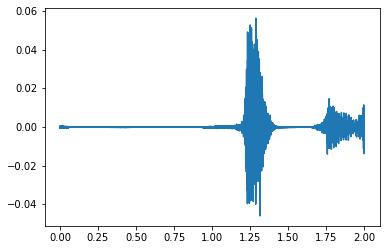

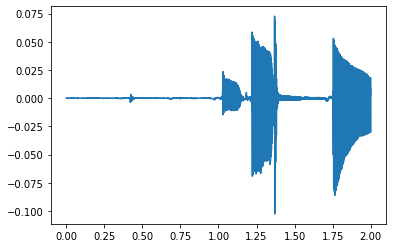

In [109]:
print(np.shape(result))

result = np.reshape(result, (10, 32000))

#result = transformer.inverse_transform(result)
#labels = val_labels[:,0:32000]
#Y_validate = transformer.inverse_transform(labels)

IPython.display.display(IPython.display.Audio(result[2], rate=SAMPLING_RATE))
IPython.display.display(IPython.display.Audio(train_labels[2], rate=SAMPLING_RATE))

plot_amplitude(result[2], SAMPLING_RATE)
plot_amplitude(train_labels[2], SAMPLING_RATE)

In [ ]:
IPython.display.display(IPython.display.Audio(result[50], rate=SAMPLING_RATE))
IPython.display.display(IPython.display.Audio(Y_validate[50], rate=SAMPLING_RATE))

In [ ]:
print(result[0])

[-0.00304616 -0.00687264 -0.00628688 ...  0.0039916   0.0020496
  0.00093685]
